# Report

## by Danil Kireev and Anastasiya Alekseeva

In [1]:
%pip install pandas seaborn matplotlib scikit-learn numpy scipy

Note: you may need to restart the kernel to use updated packages.


## 1. Correlation Coefficient

1. Find two features in your dataset with more or less “linear-like” scatterplot.
2. Display the scatter-plot and comment how well it is suitable for building a linear regression.
3. Build a linear regression of one of the features over the other. Make a comment on the meaning of the slope.
4. Find the correlation and determinacy coefficients, and comment on the meaning of the latter.
5. Make a prediction of the target values for given two or three predictor’ values; make a comment.
6. Compare the mean relative absolute error of the regression on all points of your set according to DA and ML views 
7. Compare the errors and the determinacy coefficient; make a comment.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [3]:
# load dataset and 
df = pd.read_csv("./data/horse.csv")
# remove duplicates as we want to predict from the beginning
df = df.drop_duplicates("hospital_number")
# `drop` unused columns
df = df.drop(
    columns=[
        "hospital_number",
        
        # don't wont to work with shit
        "rectal_temp",
        "rectal_exam_feces",
        "abdomen",
        "abdomo_appearance",
        "peristalsis",
        
        # values are subjective
        "temp_of_extremities",
        "peripheral_pulse",
        "mucous_membrane",
        "pain",
        
        # too many nans
        "nasogastric_tube",
        "nasogastric_reflux",
        "nasogastric_reflux_ph",
        "abdomo_protein",
        
        # useless
        "cp_data",
        
        # interesting, but too complex
        "surgical_lesion",
        "lesion_1",
        "lesion_2",
        "lesion_3",
    ]
)
# remove empty
df = df.dropna()

# stats
print(f"rows: {len(df.dropna())}, features: {len(df.columns)-1}+1")

# convert labels to ints
# store resulting encoders in dict for possible future use
le = {}

for column in df.columns:
    if df[column].dtypes == "object":
        print(f"transforming {column}")
        # loops through all columns and converts it if it's not a number
        le[column] = LabelEncoder()
        df[column] = le[column].fit_transform(df[column])

df.reset_index()
df

rows: 165, features: 8+1
transforming surgery
transforming age
transforming capillary_refill_time
transforming abdominal_distention
transforming outcome


,surgery,age,pulse,respiratory_rate,capillary_refill_time,abdominal_distention,packed_cell_volume,total_protein,outcome
0,0,0,66.0,28.0,2,2,45.0,8.4,0
1,1,0,88.0,20.0,1,3,50.0,85.0,1
2,0,0,40.0,24.0,1,1,33.0,6.7,2
3,1,1,164.0,84.0,2,2,48.0,7.2,0
6,1,0,48.0,16.0,1,0,37.0,7.0,2
...,...,...,...,...,...,...,...,...,...
288,1,0,50.0,36.0,1,3,39.0,6.6,2
291,1,0,66.0,20.0,1,0,35.0,6.9,0
293,0,0,40.0,16.0,1,1,37.0,67.0,2
296,1,0,72.0,30.0,1,0,60.0,6.8,0


In [4]:
df.describe()

,surgery,age,pulse,respiratory_rate,capillary_refill_time,abdominal_distention,packed_cell_volume,total_protein,outcome
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.587879,0.078788,71.533333,30.678788,1.248485,1.406061,45.496970,23.525455,1.381818
std,0.493715,0.270228,28.035155,17.632076,0.447296,1.173368,10.100335,27.296946,0.844442
min,0.000000,0.000000,36.000000,8.000000,0.000000,0.000000,23.000000,3.300000,0.000000
25%,0.000000,0.000000,50.000000,18.000000,1.000000,0.000000,38.000000,6.500000,1.000000
50%,1.000000,0.000000,64.000000,28.000000,1.000000,1.000000,44.000000,7.400000,2.000000
75%,1.000000,0.000000,88.000000,36.000000,2.000000,3.000000,50.000000,56.000000,2.000000
max,1.000000,1.000000,184.000000,90.000000,2.000000,3.000000,75.000000,89.000000,2.000000


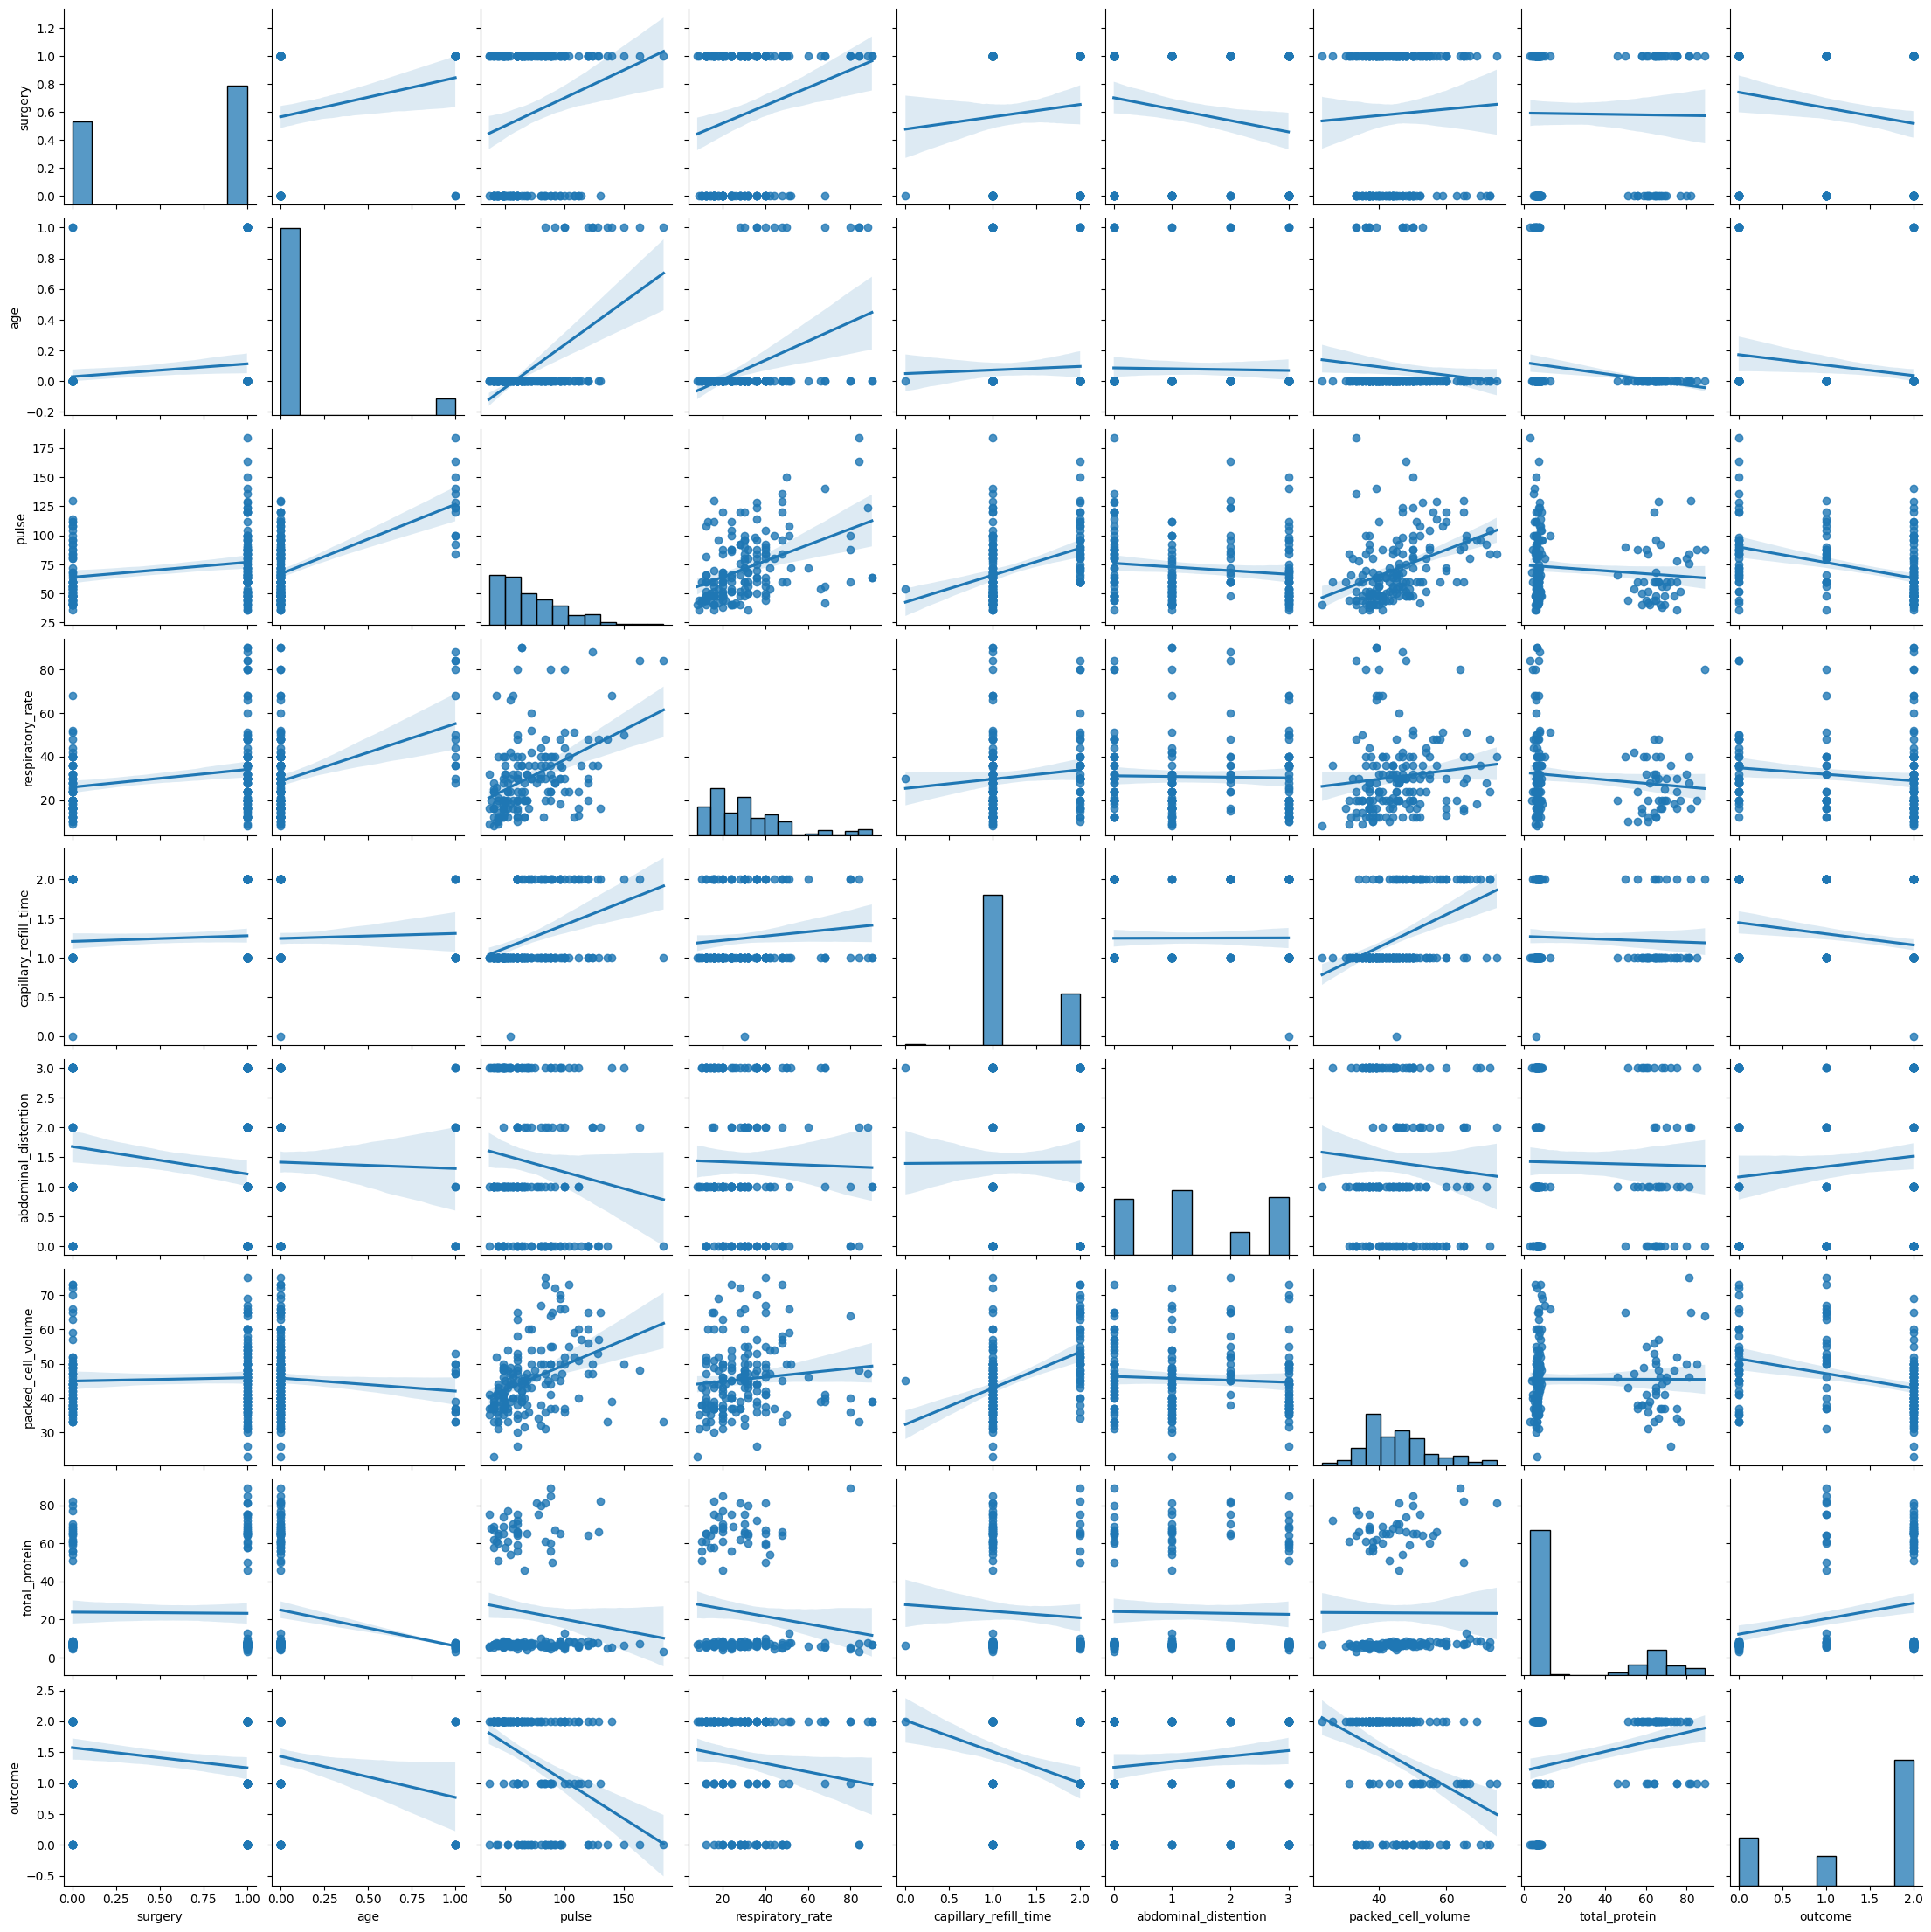

In [5]:
sns.pairplot(df, kind="reg")
plt.show()

chosen_pair=('respiratory_rate', 'pulse')


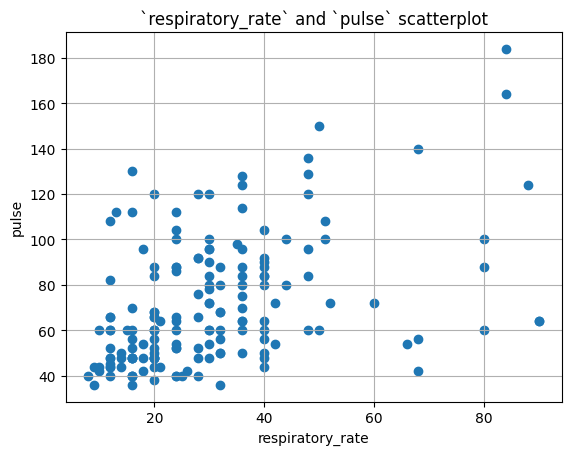

In [6]:
chosen_pair = ("respiratory_rate", "pulse")
print(f"{chosen_pair=}")

plt.scatter(df[chosen_pair[0]], df[chosen_pair[1]])

plt.title(f"`{chosen_pair[0]}` and `{chosen_pair[1]}` scatterplot")
plt.xlabel(chosen_pair[0])
plt.ylabel(chosen_pair[1])
plt.grid()

plt.show()

regression forula: `y = 0.69 * x + 50.34`


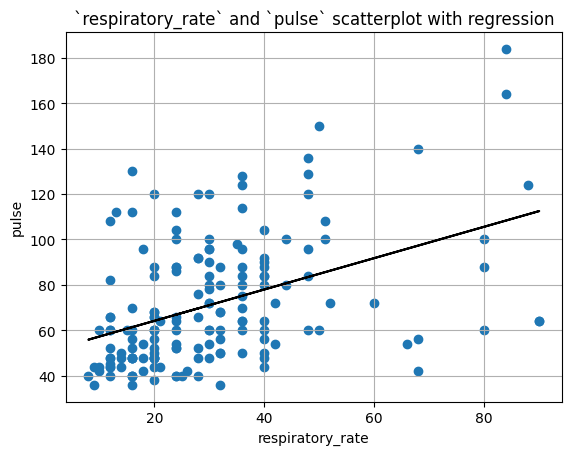

In [7]:
x = df[chosen_pair[0]].to_numpy("int")
X = x.reshape(-1, 1)
y = df[chosen_pair[1]].to_numpy("int")

reg = LinearRegression()
reg.fit(X, y)
print(f'regression forula: `y = {reg.coef_[0]:.2f} * x + {reg.intercept_:.2f}`')
# print("slope:", reg.coef_[0], "intercept: %.3f" % reg.intercept_)

y_pred = reg.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color="black")

plt.title(f"`{chosen_pair[0]}` and `{chosen_pair[1]}` scatterplot with regression")
plt.xlabel(chosen_pair[0])
plt.ylabel(chosen_pair[1])
plt.grid()

plt.show()

In [8]:
corr = pearsonr(x, y).statistic
deter = np.square(corr)
print(f"correlation coefficient: {corr:.2f}")
print(f"determinacy coefficient: {deter:.2f}")

correlation coefficient: 0.43
determinacy coefficient: 0.19


In [9]:
# selected_indices = np.random.randint(0, len(df)+1, 3)
# selected_indices.sort()

selected_indices = [50, 100, 150]

sample = []
for idx in selected_indices:
    sample.append({
        "index": idx,
        "X": x[idx],
        "true y": y[idx],
        "predicted y": y_pred[idx],
        "rounded predicted y": round(y_pred[idx]),
        "difference between targets": y[idx] - round(y_pred[idx]),
    })

pd.DataFrame(sample)

,index,X,true y,predicted y,rounded predicted y,difference between targets
0,50,36,84,75.209973,75,9
1,100,8,40,55.863644,56,-16
2,150,90,64,112.520751,113,-49


In [10]:
# don't multiply by 100 bc we already display as percent
mrae = np.mean(np.absolute(np.divide(y - y_pred, y)))
mrae_ml =  np.mean(np.absolute(np.divide(y - y_pred, y_pred)))

print(f"mean relative absolute error: {mrae:.2%}")
print(f"mean relative absolute error (according to ML and DL view): {mrae_ml:.2%}")
print(f"determinacy coefficient: {deter:.2f}")

mean relative absolute error: 29.41%
mean relative absolute error (according to ML and DL view): 27.38%
determinacy coefficient: 0.19


## 2. PCA/SVD

* In your data set, select a subset of 3-6 features related to the same aspect and explain your choice

* Standardize the selected subset; compute its data scatter and SVD; determine contributions of all the principal components to the data scatter, naturally and per cent; give interpretation to the first and the second principal component.

* Visualize the data using two first principal components at the standardization with two versions of normalization: (a) range normalization and (b) z-scoring. At these visualizations, use a distinct shape/color for points representing a pre-specified by yourselves group (or groups) of objects. Also, apply the conventional PCA for finding two first principal components and visualization; compare to the results at z-scoring. Comment on which of the normalizations is better and why, if any.

* Compute and interpret a hidden ranking factor behind the selected features. The factor should be expressed in a 0-100 rank scale (as well as the features – ranking normalization).

In [11]:
selected_features = ["pulse", "respiratory_rate", "packed_cell_volume"]
print(f"{selected_features=}")

df[selected_features]

selected_features=['pulse', 'respiratory_rate', 'packed_cell_volume']


,pulse,respiratory_rate,packed_cell_volume
0,66.0,28.0,45.0
1,88.0,20.0,50.0
2,40.0,24.0,33.0
3,164.0,84.0,48.0
6,48.0,16.0,37.0
...,...,...,...
288,50.0,36.0,39.0
291,66.0,20.0,35.0
293,40.0,16.0,37.0
296,72.0,30.0,60.0


In [12]:
class RangeScaler:
    def __init__(self):
        self.mean_values = None
        self.max_values = None
        self.min_values = None

    def fit(self, data):
        self.mean = data.mean(axis=0)
        self.max = data.max(axis=0)
        self.min = data.min(axis=0)

    def transform(self, data):
        return (data - self.mean) / (self.max - self.min)

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

scaling:	no scaling
data scatter:	1537765.50
contributions:	1469019.3534, 38091.8924, 30654.2542
per cent contributions:	95.5295%, 2.4771%, 1.9934%

scaling:	range normalization
data scatter:	19.65
contributions:	10.7609, 6.0030, 2.8909
per cent contributions:	54.7495%, 30.5421%, 14.7084%

scaling:	z-scoring
data scatter:	495.00
contributions:	272.2977, 146.5748, 76.1276
per cent contributions:	55.0096%, 29.6111%, 15.3793%



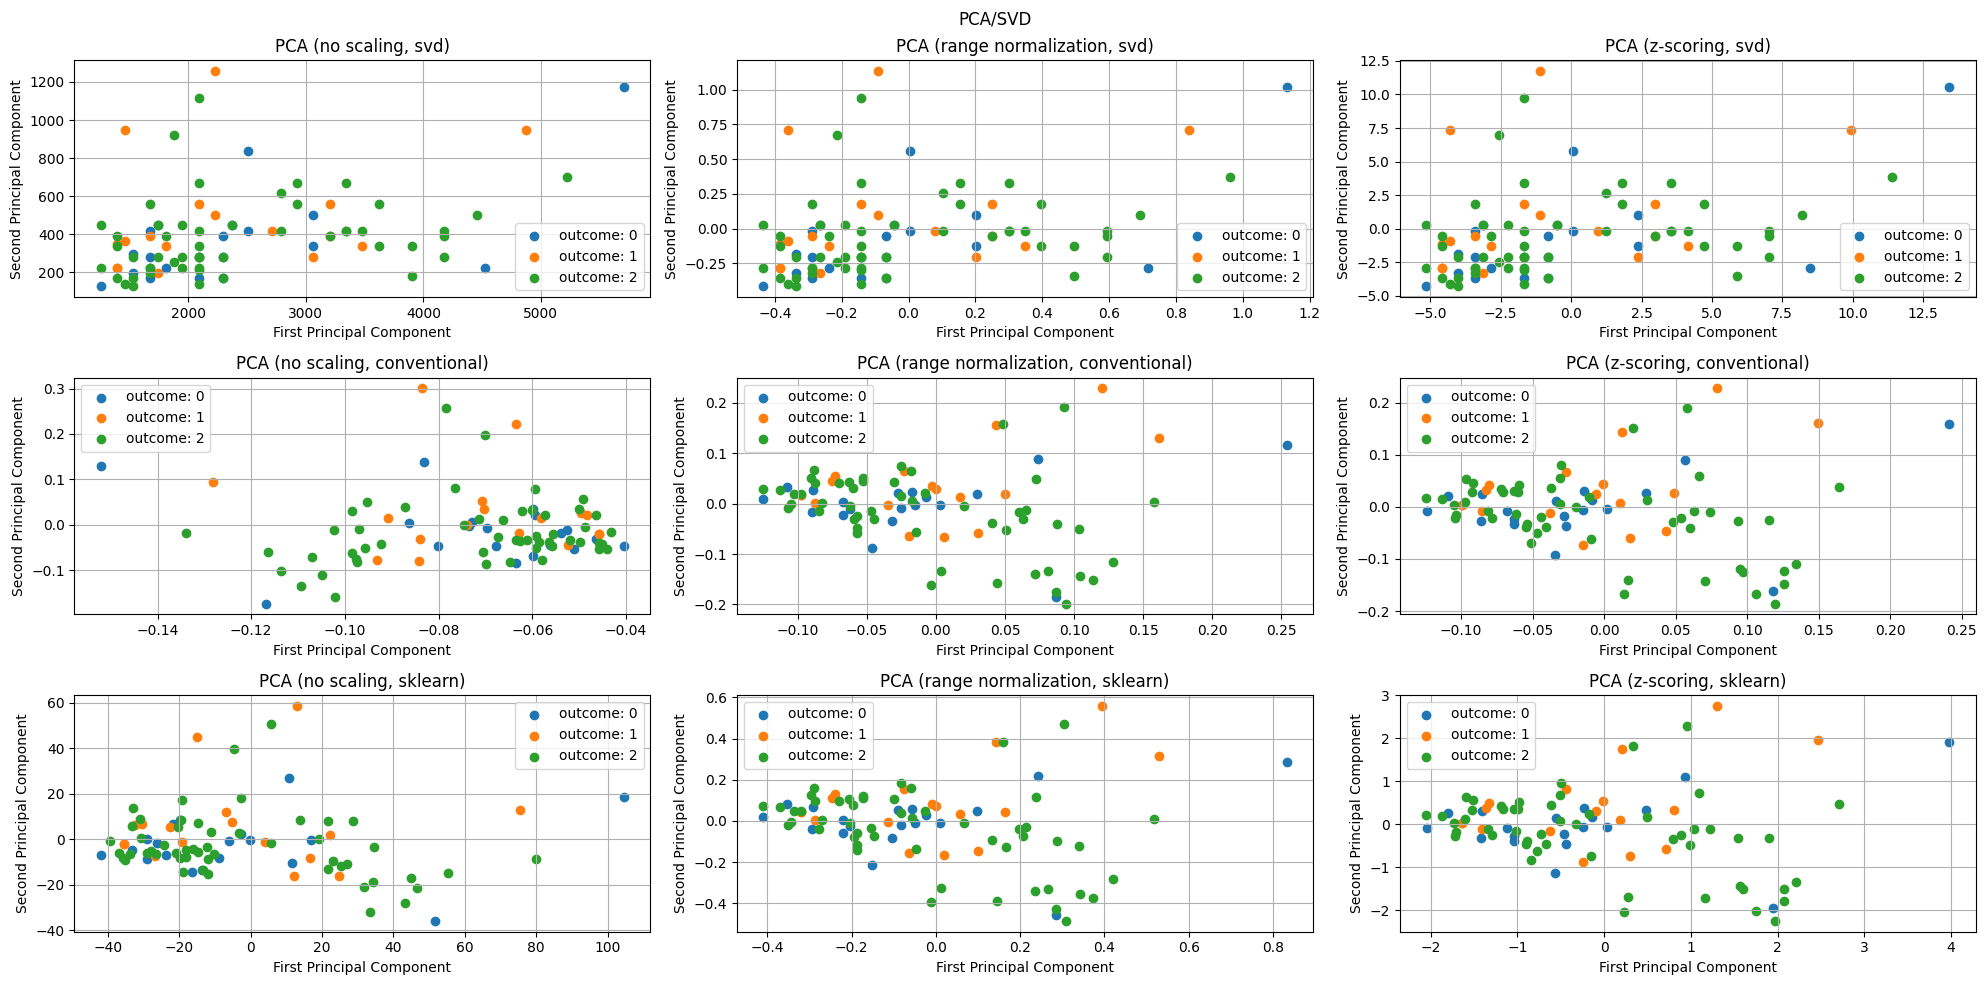

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

normalizers = (
    ("no scaling", None),
    ("range normalization", RangeScaler),
    ("z-scoring", StandardScaler),
)

pca_types = ("conventional", "")
plot_types = ("svd", "conventional", "sklearn")

fg, axs = plt.subplots(len(plot_types), len(normalizers), figsize=(20, 10))

for n_i, (normalize_name, normalizer_constructor) in enumerate(normalizers):
    print(f"scaling:\t{normalize_name}")

    normalizer = (
        normalizer_constructor() if normalizer_constructor is not None else None
    )
    df_scaled = (
        pd.DataFrame(
            normalizer.fit_transform(selected_df := df[selected_features]),
            columns=selected_df.columns,
        )
        if normalizer is not None
        else df[selected_features]
    )

    ds = (df_scaled.to_numpy() ** 2).sum()

    print(f"data scatter:\t{ds:.2f}")

    Z, Mu, C = np.linalg.svd(df_scaled.to_numpy(), full_matrices=True)

    n_contributions = Mu**2
    print(f"contributions:\t{', '.join(map(lambda el: f'{el:.4f}', n_contributions))}")
    p_contributions = n_contributions / ds
    print(
        f"per cent contributions:\t{', '.join(map(lambda el: f'{el:.4%}' , p_contributions))}"
    )

    for p_i, p_type in enumerate(plot_types):
        if p_type == "svd":
            pc1 = df_scaled.to_numpy()[:, 0] * np.sqrt(Mu[0])
            pc2 = df_scaled.to_numpy()[:, 1] * np.sqrt(Mu[1])
            df_reduced = pd.DataFrame(np.array([pc1, pc2]).T, columns=["pc1", "pc2"])

        elif p_type == "conventional":
            X = df_scaled.to_numpy()
            B = (X.T @ X) / X.shape[0]
            L, C = np.linalg.eig(B)
            sorted_idx = np.flip(np.argsort(L))
            la1 = L[sorted_idx[0]]
            c1 = C[:, sorted_idx[0]]
            pc1 = np.divide(X @ c1, np.sqrt(X.shape[0] * la1))
            la2 = L[sorted_idx[1]]
            c2 = -C[:, sorted_idx[1]]
            pc2 = np.divide(X @ c2, np.sqrt(X.shape[0] * la2))
            df_reduced = pd.DataFrame(np.array([pc1, pc2]).T, columns=["pc1", "pc2"])

        elif p_type == "sklearn":
            pca = PCA(n_components=2)
            df_reduced = pd.DataFrame(pca.fit_transform(df_scaled.to_numpy()))

        else:
            raise ValueError

        df_reduced["outcome"] = df["outcome"]

        # display(df_reduced)

        for _, diff in df_reduced.groupby("outcome"):
            axs[p_i, n_i].scatter(
                diff.iloc[:, 0],
                diff.iloc[:, 1],
                label=f"outcome: {diff['outcome'].unique()[0]:g}",
            )

        axs[p_i, n_i].set_title(f"PCA ({normalize_name}, {p_type})")
        axs[p_i, n_i].set_xlabel("First Principal Component")
        axs[p_i, n_i].set_ylabel("Second Principal Component")
        axs[p_i, n_i].legend()
        axs[p_i, n_i].grid()

    print()

fg.suptitle("PCA/SVD")
fg.tight_layout()

In [14]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = MinMaxScaler(feature_range=(0, 100)).fit_transform(df[selected_features])
Z, Mu, C = np.linalg.svd(df_scaled, full_matrices=True)
alpha = 1 / (-C[0]).sum()
ranks = df_scaled @ (-C[0]) * alpha
ranks.sort()

n = 10

print(f"ranks(top-{n}):\t{', '.join(map(lambda el: f'{el:.4f}', ranks[-n:]))}")
print(f"ranks(bottom-{n}):\t{', '.join(map(lambda el: f'{el:.4f}', ranks[:n]))}")
print()

tmp = df.iloc[np.argsort(ranks)].copy()
tmp["rank"] = ranks

print('Highest n ranks:')
display(tmp.tail(n))

print('Lowest n ranks:')
display(tmp.head(n))

ranks(top-10):	59.7840, 60.0565, 60.4324, 62.5260, 63.2127, 63.9210, 64.9380, 65.1318, 69.8547, 71.5341
ranks(bottom-10):	0.7202, 8.5266, 10.4487, 11.2923, 12.0153, 13.0971, 13.9922, 14.4122, 14.4166, 14.6604

Highest n ranks:


,surgery,age,pulse,respiratory_rate,capillary_refill_time,abdominal_distention,packed_cell_volume,total_protein,outcome,rank
276,0,0,50.0,40.0,1,3,37.5,6.5,2,59.784004
277,0,0,40.0,16.0,1,1,37.0,6.8,2,60.056493
278,0,0,56.0,40.0,1,0,47.0,7.2,2,60.432430
284,1,0,66.0,24.0,1,1,40.0,6.7,2,62.525953
285,0,0,82.0,12.0,2,0,50.0,7.0,1,63.212748
288,1,0,50.0,36.0,1,3,39.0,6.6,2,63.920955
291,1,0,66.0,20.0,1,0,35.0,6.9,0,64.937972
293,0,0,40.0,16.0,1,1,37.0,67.0,2,65.131787
296,1,0,72.0,30.0,1,0,60.0,6.8,0,69.854677
297,1,0,100.0,24.0,1,0,50.0,6.0,2,71.534113


Lowest n ranks:


,surgery,age,pulse,respiratory_rate,capillary_refill_time,abdominal_distention,packed_cell_volume,total_protein,outcome,rank
0,0,0,66.0,28.0,2,2,45.0,8.4,0,0.720156
1,1,0,88.0,20.0,1,3,50.0,85.0,1,8.526582
2,0,0,40.0,24.0,1,1,33.0,6.7,2,10.448654
3,1,1,164.0,84.0,2,2,48.0,7.2,0,11.292283
6,1,0,48.0,16.0,1,0,37.0,7.0,2,12.015289
8,0,0,80.0,36.0,1,2,38.0,6.2,1,13.097130
10,1,0,66.0,12.0,1,1,44.0,6.0,2,13.992246
11,0,0,72.0,52.0,1,3,50.0,7.8,2,14.412179
13,0,1,92.0,28.0,1,3,37.0,6.1,0,14.416637
14,1,0,76.0,28.0,1,1,46.0,81.0,2,14.660367


## 3. Cluster analysis and cluster interpretation

1. Choose 3 or more quantitative features, explain your choice and apply K-means clustering method:
for K=4,
for K=7.
At each of the two cases, make about 10 runs of the algorithm starting at random initializations, record information of them in the report, and choose the best of them according to the criterion value.

2. Interpret each of the two chosen partitions with the help of relative differences between within-cluster centers and the grand mean. 

3. Make a judgement on which of the two partitions is better for interpretation. 


In [15]:
selected_features = ["surgery", "age", "capillary_refill_time", "abdominal_distention"]
print(f"{selected_features=}")

df[selected_features]

selected_features=['surgery', 'age', 'capillary_refill_time', 'abdominal_distention']


,surgery,age,capillary_refill_time,abdominal_distention
0,0,0,2,2
1,1,0,1,3
2,0,0,1,1
3,1,1,2,2
6,1,0,1,0
...,...,...,...,...
288,1,0,1,3
291,1,0,1,0
293,0,0,1,1
296,1,0,1,0


In [16]:
from sklearn.cluster import KMeans

repeats = 10
K_range = (4, 7)

logs = []

for K in K_range:
    print(f"clustering into {K} clusters")
    for trial_i in range(repeats):
        k_means = KMeans(
            n_clusters=K,
            init="random",
            n_init="auto",
        ).fit(StandardScaler().fit_transform(df[selected_features]))

        logs.append(
            {
                "K": K,
                "inertia": k_means.inertia_,
                "cluster_centres": k_means.cluster_centers_,
                "labels": k_means.labels_,
            }
        )
    
logs_df = pd.DataFrame(logs)
display(logs_df)

for K in K_range:
    print(f"best run for {K} clusters (by intertia):")
    display(logs_df[logs_df["K"]==K].sort_values("inertia").head(1))

clustering into 4 clusters
clustering into 7 clusters


,K,inertia,cluster_centres,labels
0,4,248.020089,"[[-0.347838883714358, -0.29244882593280086, -0...","[2, 0, 1, 3, 1, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, ..."
1,4,222.352387,"[[0.03531852661841183, -0.29244882593280086, 1...","[0, 2, 3, 1, 2, 3, 2, 3, 1, 2, 2, 1, 2, 0, 3, ..."
2,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[3, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 3, 1, ..."
3,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[2, 0, 1, 3, 0, 1, 0, 1, 3, 0, 0, 3, 0, 2, 1, ..."
4,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[3, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 3, 1, ..."
5,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[1, 0, 3, 2, 0, 3, 0, 3, 2, 0, 0, 2, 0, 1, 3, ..."
6,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[1, 0, 2, 3, 0, 2, 0, 2, 3, 0, 0, 3, 0, 1, 2, ..."
7,4,239.142262,"[[-0.6947694401536744, -0.2924488259328011, -0...","[2, 0, 0, 1, 3, 0, 3, 0, 1, 3, 3, 1, 3, 2, 0, ..."
8,4,222.352387,"[[0.5247181526964039, 3.4194016570604413, 0.13...","[3, 2, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2, 3, 1, ..."
9,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[1, 0, 2, 3, 0, 2, 0, 2, 3, 0, 0, 3, 0, 1, 2, ..."


best run for 4 clusters (by intertia):


,K,inertia,cluster_centres,labels
3,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[2, 0, 1, 3, 0, 1, 0, 1, 3, 0, 0, 3, 0, 2, 1, ..."


best run for 7 clusters (by intertia):


,K,inertia,cluster_centres,labels
16,7,97.32583,"[[-1.1943494414262907, -0.29244882593280075, -...","[5, 4, 0, 3, 1, 2, 1, 2, 3, 1, 1, 3, 1, 5, 0, ..."


In [17]:
def report_cluster_info(row):
    K = row["K"]
    labels = row["labels"]
    cluster_centres = row["cluster_centres"]

    cluster_info = {}
    for cluster_i in range(K):
        idxs = np.where(labels == cluster_i)
        cm = df[selected_features].to_numpy()[idxs].mean(axis=0)
        gm = df[selected_features].to_numpy().mean(axis=0)
        cluster_info[cluster_i] = {
            "cluster_i": cluster_i,
            "cluster_size": len(labels[labels == cluster_i]),
            "cluster_centre": cluster_centres[cluster_i],
            "cluster_mean": cm,
            "grand_mean": gm,
            "differences": cm - gm,
            "relative_differences": 100 * (cm - gm) / gm,
        }

    return cluster_info


logs_df["cluster_info"] = logs_df.apply(report_cluster_info, axis=1)
logs_df

,K,inertia,cluster_centres,labels,cluster_info
0,4,248.020089,"[[-0.347838883714358, -0.29244882593280086, -0...","[2, 0, 1, 3, 1, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, ...","{0: {'cluster_i': 0, 'cluster_size': 36, 'clus..."
1,4,222.352387,"[[0.03531852661841183, -0.29244882593280086, 1...","[0, 2, 3, 1, 2, 3, 2, 3, 1, 2, 2, 1, 2, 0, 3, ...","{0: {'cluster_i': 0, 'cluster_size': 38, 'clus..."
2,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[3, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 3, 1, ...","{0: {'cluster_i': 0, 'cluster_size': 63, 'clus..."
3,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[2, 0, 1, 3, 0, 1, 0, 1, 3, 0, 0, 3, 0, 2, 1, ...","{0: {'cluster_i': 0, 'cluster_size': 63, 'clus..."
4,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[3, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 3, 1, ...","{0: {'cluster_i': 0, 'cluster_size': 63, 'clus..."
5,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[1, 0, 3, 2, 0, 3, 0, 3, 2, 0, 0, 2, 0, 1, 3, ...","{0: {'cluster_i': 0, 'cluster_size': 63, 'clus..."
6,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[1, 0, 2, 3, 0, 2, 0, 2, 3, 0, 0, 3, 0, 1, 2, ...","{0: {'cluster_i': 0, 'cluster_size': 63, 'clus..."
7,4,239.142262,"[[-0.6947694401536744, -0.2924488259328011, -0...","[2, 0, 0, 1, 3, 0, 3, 0, 1, 3, 3, 1, 3, 2, 0, ...","{0: {'cluster_i': 0, 'cluster_size': 61, 'clus..."
8,4,222.352387,"[[0.5247181526964039, 3.4194016570604413, 0.13...","[3, 2, 1, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2, 3, 1, ...","{0: {'cluster_i': 0, 'cluster_size': 13, 'clus..."
9,4,222.352387,"[[0.8372758970823493, -0.2924488259328011, -0....","[1, 0, 2, 3, 0, 2, 0, 2, 3, 0, 0, 3, 0, 1, 2, ...","{0: {'cluster_i': 0, 'cluster_size': 63, 'clus..."


In [18]:
for i, row in logs_df.iterrows():
    print(f"clustering info number {i}")
    print(f"num clusters: {row['K']}")
    print(f"inertia: {row['inertia']}")
    # print(f"cluster centres: {row['cluster_info']}")
    # print(f"labels: {row['labels']}")
    print()
    for idx, info in row["cluster_info"].items():
        print(f"cluster {idx}:\t{info['cluster_size']} elements")
        print(f"cluster centre:\t{info['cluster_centre']}")
        print(f"cluster mean:\t{info['cluster_mean']}")
        print(f"grand mean:\t{info['grand_mean']}")
        print(f"differences:\t{info['differences']}")
        print(f"relative differences:\t{info['relative_differences']}")
    
    print("=-"*45)

clustering info number 0
num clusters: 4
inertia: 248.0200893087182

cluster 0:	36 elements
cluster centre:	[-0.34783888 -0.29244883 -0.61950805  1.31507506]
cluster mean:	[0.41666667 0.         0.97222222 2.94444444]
grand mean:	[0.58787879 0.07878788 1.24848485 1.40606061]
differences:	[-0.17121212 -0.07878788 -0.27626263  1.53838384]
relative differences:	[ -29.12371134 -100.          -22.12783172  109.41091954]
cluster 1:	78 elements
cluster centre:	[ 0.05588154 -0.29244883 -0.55721748 -0.62110545]
cluster mean:	[0.61538462 0.         1.         0.67948718]
grand mean:	[0.58787879 0.07878788 1.24848485 1.40606061]
differences:	[ 0.02750583 -0.07878788 -0.24848485 -0.72657343]
relative differences:	[   4.67882633 -100.          -19.90291262  -51.67440318]
cluster 2:	38 elements
cluster centre:	[ 0.03531853 -0.29244883  1.68524311  0.05780749]
cluster mean:	[0.60526316 0.         2.         1.47368421]
grand mean:	[0.58787879 0.07878788 1.24848485 1.40606061]
differences:	[ 0.0173843

In [19]:
logs_df["cluster_info"][0]

{0: {'cluster_i': 0,
  'cluster_size': 36,
  'cluster_centre': array([-0.34783888, -0.29244883, -0.61950805,  1.31507506]),
  'cluster_mean': array([0.41666667, 0.        , 0.97222222, 2.94444444]),
  'grand_mean': array([0.58787879, 0.07878788, 1.24848485, 1.40606061]),
  'differences': array([-0.17121212, -0.07878788, -0.27626263,  1.53838384]),
  'relative_differences': array([ -29.12371134, -100.        ,  -22.12783172,  109.41091954])},
 1: {'cluster_i': 1,
  'cluster_size': 78,
  'cluster_centre': array([ 0.05588154, -0.29244883, -0.55721748, -0.62110545]),
  'cluster_mean': array([0.61538462, 0.        , 1.        , 0.67948718]),
  'grand_mean': array([0.58787879, 0.07878788, 1.24848485, 1.40606061]),
  'differences': array([ 0.02750583, -0.07878788, -0.24848485, -0.72657343]),
  'relative_differences': array([   4.67882633, -100.        ,  -19.90291262,  -51.67440318])},
 2: {'cluster_i': 2,
  'cluster_size': 38,
  'cluster_centre': array([ 0.03531853, -0.29244883,  1.68524311,

## 4. Contingency Table

1. Consider two nominal features over your dataset (one of them, not more, may be taken from nominal features in your data, the other is to be developed by yourself). 

2. Build a contingency table over them; compute conditional frequency and Quetelet index tables. Make comments on maximally associated categories of the features.

3. Compute and compare the average Quetelet index and Pearson’s chi-squared.

3. Tell what numbers of observations would suffice to see the features as associated at 95% confidence level; 99% confidence level – consult internet for statistical tables if needed.


In [20]:
cont_df = pd.DataFrame()
cont_df["cat_packed_cell_volume"] = pd.cut(df["packed_cell_volume"], 3, retbins=False, labels=False)
cont_df["capillary_refill_time"] = df["capillary_refill_time"]
cont_df

,cat_packed_cell_volume,capillary_refill_time
0,1,2
1,1,1
2,0,1
3,1,2
6,0,1
...,...,...
288,0,1
291,0,1
293,0,1
296,2,1


col='cat_packed_cell_volume'
cat_packed_cell_volume
1    82
0    62
2    21
Name: count, dtype: int64



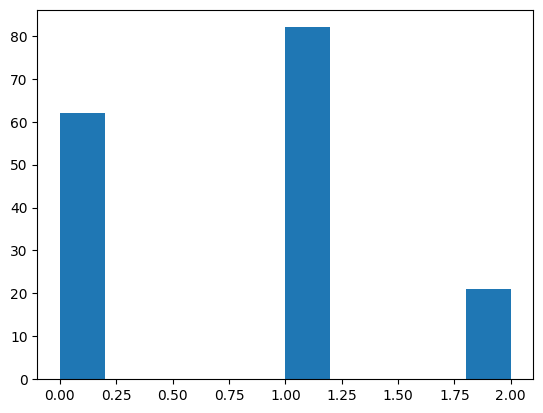

col='capillary_refill_time'
capillary_refill_time
1    122
2     42
0      1
Name: count, dtype: int64



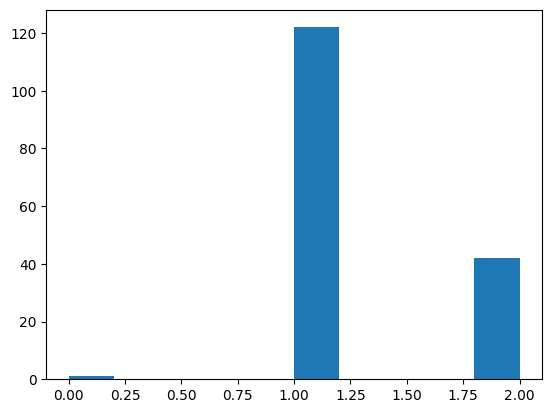

In [21]:
for col in cont_df.columns:
    print(f"{col=}")
    print(f"{cont_df[col].value_counts()}")
    print()
    plt.hist(cont_df[col].to_numpy())
    plt.show()

In [22]:
cross_table = pd.crosstab(cont_df['cat_packed_cell_volume'], cont_df['capillary_refill_time'], margins=True, margins_name="Total:")
cross_table

capillary_refill_time,0,1,2,Total:
cat_packed_cell_volume,,,,
0,0,57,5,62
1,1,59,22,82
2,0,6,15,21
Total:,1,122,42,165


In [23]:
relative_freq_table = pd.crosstab(cont_df['cat_packed_cell_volume'], cont_df['capillary_refill_time'], margins=True, margins_name="Total:")
relative_freq_table = relative_freq_table/len(cont_df)

relative_freq_table

capillary_refill_time,0,1,2,Total:
cat_packed_cell_volume,,,,
0,0.000000,0.345455,0.030303,0.375758
1,0.006061,0.357576,0.133333,0.496970
2,0.000000,0.036364,0.090909,0.127273
Total:,0.006061,0.739394,0.254545,1.000000


In [24]:
condit_freq_table = pd.crosstab(cont_df['cat_packed_cell_volume'], cont_df['capillary_refill_time'], margins=True, margins_name="Total:")
condit_freq_table = condit_freq_table/len(cont_df)

for x_val in set(cont_df["cat_packed_cell_volume"]):
  for y_val in set(cont_df["capillary_refill_time"]):
    condit_freq_table.loc[x_val, y_val] = condit_freq_table.loc[x_val, y_val] / condit_freq_table.loc[x_val, "Total:"]

condit_freq_table

capillary_refill_time,0,1,2,Total:
cat_packed_cell_volume,,,,
0,0.000000,0.919355,0.080645,0.375758
1,0.012195,0.719512,0.268293,0.496970
2,0.000000,0.285714,0.714286,0.127273
Total:,0.006061,0.739394,0.254545,1.000000


In [25]:
quetlet_table = pd.crosstab(cont_df['cat_packed_cell_volume'], cont_df['capillary_refill_time'], margins=True, margins_name="Total:")
quetlet_table = quetlet_table/len(cont_df)

for x_val in set(cont_df["cat_packed_cell_volume"]):
  for y_val in set(cont_df["capillary_refill_time"]):
    quetlet_table.loc[x_val, y_val] = quetlet_table.loc[x_val, y_val] / quetlet_table.loc[x_val, "Total:"]
    quetlet_table.loc[x_val, y_val] = 100 * (quetlet_table.loc[x_val, y_val] - quetlet_table.loc["Total:", y_val]) / quetlet_table.loc["Total:", y_val]

quetlet_table

capillary_refill_time,0,1,2,Total:
cat_packed_cell_volume,,,,
0,-100.000000,24.338974,-68.317972,0.375758
1,101.219512,-2.688924,5.400697,0.496970
2,-100.000000,-61.358314,180.612245,0.127273
Total:,0.006061,0.739394,0.254545,1.000000


In [26]:
qq_table = pd.crosstab(cont_df['cat_packed_cell_volume'], cont_df['capillary_refill_time'], margins=True, margins_name="Total:")
qq_table = qq_table/len(cont_df)

for x_val in set(cont_df["cat_packed_cell_volume"]):
  for y_val in set(cont_df["capillary_refill_time"]):
    qq_table.loc[x_val, y_val] = 100*((qq_table.loc[x_val, y_val] / (quetlet_table.loc[x_val, "Total:"] * quetlet_table.loc["Total:", y_val])) - 1)

qq_table

capillary_refill_time,0,1,2,Total:
cat_packed_cell_volume,,,,
0,-100.000000,24.338974,-68.317972,0.375758
1,101.219512,-2.688924,5.400697,0.496970
2,-100.000000,-61.358314,180.612245,0.127273
Total:,0.006061,0.739394,0.254545,1.000000


In [27]:
q_table = relative_freq_table*quetlet_table/100

q_table = q_table.drop("Total:")
q_table = q_table.drop("Total:", axis=1)

Q = q_table.sum().sum()
print(f"{Q:.4f}")

0.2090


In [28]:
chi_table = pd.crosstab(cont_df['cat_packed_cell_volume'], cont_df['capillary_refill_time'], margins=True, margins_name="Total:")
chi_table = chi_table/len(cont_df)

for x_val in set(cont_df["cat_packed_cell_volume"]):
  for y_val in set(cont_df["capillary_refill_time"]):
    chi_table.loc[x_val, y_val] = (
        np.square(chi_table.loc[x_val, y_val] -  (chi_table.loc[x_val, "Total:"] * chi_table.loc["Total:", y_val]))
        / (chi_table.loc[x_val, "Total:"] * chi_table.loc["Total:", y_val])
    )

chi_table = chi_table.drop("Total:")
chi_table = chi_table.drop("Total:", axis=1)

phi_sq = chi_table.sum().sum()
print(f"{phi_sq:.4f}")

0.2090


In [29]:
chi_sq = len(cont_df)*phi_sq
print(f"{chi_sq:.2f}")

34.48


In [30]:
12.592/phi_sq

60.254853711400536

In [31]:
16.812/phi_sq

80.44826878939531

## 5. Bootstrap

For one of the partitions created at HW 3 and a feature
1. Find the 95% confidence interval for its grand mean by using bootstrap 
2. Compare means of the feature in two clusters using bootstrap
3. Take a cluster, and compare the grand mean with the within-cluster mean for the feature by using bootstrap

Note: each application of bootstrap should be done in both versions, pivotal and non-pivotal.


In [32]:
clustered_df = df.copy()

for K in K_range:
    clustered_df[f"{K}_cluster"] = logs_df[logs_df["K"]==K].sort_values("inertia").head(1)["labels"].values[0]

clustered_df

,surgery,age,pulse,respiratory_rate,capillary_refill_time,abdominal_distention,packed_cell_volume,total_protein,outcome,4_cluster,7_cluster
0,0,0,66.0,28.0,2,2,45.0,8.4,0,2,5
1,1,0,88.0,20.0,1,3,50.0,85.0,1,0,4
2,0,0,40.0,24.0,1,1,33.0,6.7,2,1,0
3,1,1,164.0,84.0,2,2,48.0,7.2,0,3,3
6,1,0,48.0,16.0,1,0,37.0,7.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
288,1,0,50.0,36.0,1,3,39.0,6.6,2,0,4
291,1,0,66.0,20.0,1,0,35.0,6.9,0,0,1
293,0,0,40.0,16.0,1,1,37.0,67.0,2,1,0
296,1,0,72.0,30.0,1,0,60.0,6.8,0,0,1


<Axes: >

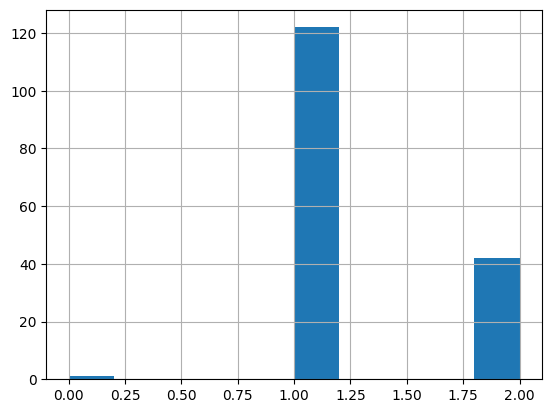

<Axes: >

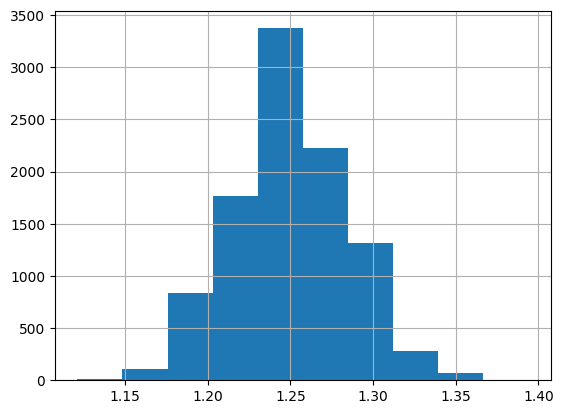

95% confidence intervals for the expected value for the whole dataset.
Pivotal bootstrap: (1.1800631825903323, 1.316534393167244)
Non-pivotal bootstrap: (1.1818181818181819, 1.3151515151515152)


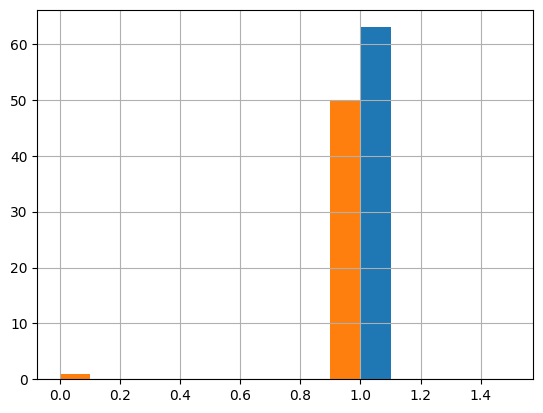

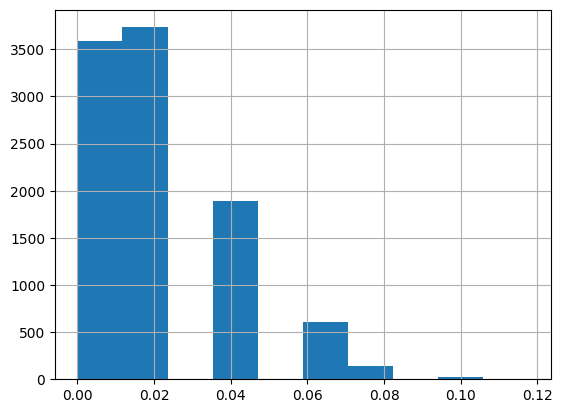

95% confidence intervals for the comparison of expected values for two clusters.
Pivotal bootstrap: (-0.018330160904376003, 0.057949768747513286)
Non-pivotal bootstrap: (0.0, 0.05882352941176472)
Expected values are:  the same


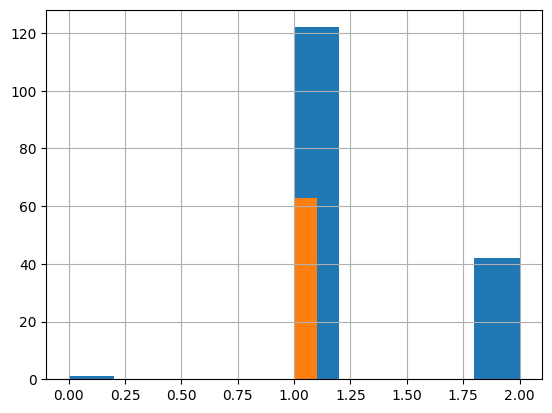

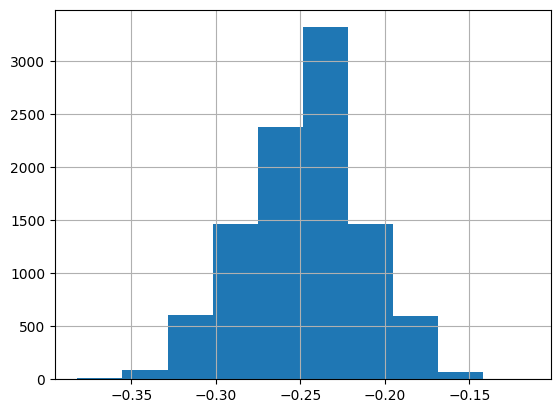

95% confidence intervals for the comparison of expected values between a cluster and dataset.
Pivotal bootstrap: (-0.31632369439292146, -0.18078297227374518)
Non-pivotal bootstrap: (-0.3151515151515152, -0.18181818181818188)
Expected values are: *not* the same


In [33]:
# Specify K and clusters of interest
K = 4
feature = "capillary_refill_time"
clusters = (0, 1)


def bootstrap(df1, df2=None, trials_count=10000):
    return pd.Series(
        (
            df1[feature].sample(n=df1.shape[0], replace=True).mean()
            - (
                0
                if df2 is None
                else df2[feature].sample(n=df2.shape[0], replace=True).mean()
            )
            for _ in range(trials_count)
        )
    )


def expected_value(bootstrapped_means, is_pivotal):
    if is_pivotal:
        return (
            bootstrapped_means.mean() - 1.96 * bootstrapped_means.std(),
            bootstrapped_means.mean() + 1.96 * bootstrapped_means.std(),
        )
    else:
        bootstrapped_means = bootstrapped_means.sort_values(ignore_index=True)
        return (
            bootstrapped_means[int(bootstrapped_means.size * 0.025)],
            bootstrapped_means[
                int(bootstrapped_means.size - bootstrapped_means.size * 0.025)
            ],
        )


# Expected value for the whole dataset
bootstrapped_means = bootstrap(clustered_df)
estimation_dataset_pivotal = expected_value(bootstrapped_means, True)
estimation_dataset_nonpivotal = expected_value(bootstrapped_means, False)

display(clustered_df[feature].hist())
plt.show()
display(bootstrapped_means.hist())
plt.show()

print("95% confidence intervals for the expected value for the whole dataset.")
print(f"Pivotal bootstrap: {estimation_dataset_pivotal}")
print(f"Non-pivotal bootstrap: {estimation_dataset_nonpivotal}")

# Comparison of expected values between two clusters
bootstrapped_means = bootstrap(
    clustered_df[clustered_df[f"{K}_cluster"] == clusters[0]], clustered_df[clustered_df[f"{K}_cluster"] == clusters[1]]
)
comparison_clusters_pivotal = expected_value(bootstrapped_means, True)
comparison_clusters_nonpivotal = expected_value(bootstrapped_means, False)

clustered_df[clustered_df[f"{K}_cluster"] == clusters[0]][feature].hist()
clustered_df[clustered_df[f"{K}_cluster"] == clusters[1]][feature].hist()
plt.show()
bootstrapped_means.hist()
plt.show()

print("95% confidence intervals for the comparison of expected values for two clusters.")
print(f"Pivotal bootstrap: {comparison_clusters_pivotal}")
print(f"Non-pivotal bootstrap: {comparison_clusters_nonpivotal}")
print(f"Expected values are: {'' if comparison_clusters_pivotal[0] < 0 < comparison_clusters_pivotal[1] else '*not*'} the same")

# Comparison of expected values between one of the clusters and the whole dataset
bootstrapped_means = bootstrap(clustered_df[clustered_df[f"{K}_cluster"]  == clusters[0]], clustered_df)
comparison_dataset_pivotal = expected_value(bootstrapped_means, True)
comparison_dataset_nonpivotal = expected_value(bootstrapped_means, False)

clustered_df[feature].hist()
clustered_df[clustered_df[f"{K}_cluster"]  == clusters[0]][feature].hist()
plt.show()
bootstrapped_means.hist()
plt.show()

print("95% confidence intervals for the comparison of expected values between a cluster and dataset.")
print(f"Pivotal bootstrap: {comparison_dataset_pivotal}")
print(f"Non-pivotal bootstrap: {comparison_dataset_nonpivotal}")
print(f"Expected values are: {'' if comparison_dataset_pivotal[0] < 0 < comparison_dataset_pivotal[1] else '*not*'} the same")